<a href="https://colab.research.google.com/github/sailu708d/kmeans_clustering_update-1-.ipynb/blob/main/kmeans_clustering_updated_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X

array([1.57830790e-01, 9.72183063e-01, 2.41470566e-01, 5.94823146e-01,
       4.27302895e-01, 6.07772417e-01, 1.66918126e-01, 2.33928524e-01,
       5.50930590e-01, 5.08302855e-01, 1.62748996e-01, 4.65979259e-01,
       5.30867122e-01, 2.78749959e-01, 4.11864853e-01, 5.05314071e-01,
       2.84489207e-02, 2.56832290e-01, 1.05276875e-01, 2.62953415e-01,
       5.60594637e-01, 9.29975031e-01, 7.46930870e-01, 6.65739203e-01,
       3.35538446e-01, 9.35655070e-01, 7.29589452e-01, 9.85494077e-01,
       8.14607682e-01, 2.62712932e-01, 8.99415592e-01, 4.37606307e-01,
       2.61969324e-01, 3.82646361e-01, 1.03511929e-01, 4.15127092e-01,
       8.75827580e-01, 8.89862806e-01, 9.80086758e-01, 3.58040727e-01,
       3.89902799e-01, 8.23699047e-01, 6.31208518e-01, 9.00131981e-01,
       3.35592711e-01, 9.07032119e-01, 9.11951034e-01, 6.87666900e-01,
       9.01353830e-01, 8.25382322e-01, 4.93043654e-01, 9.62447520e-01,
       6.14376142e-01, 8.39368296e-01, 6.19163253e-01, 1.34544093e-01,
      

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


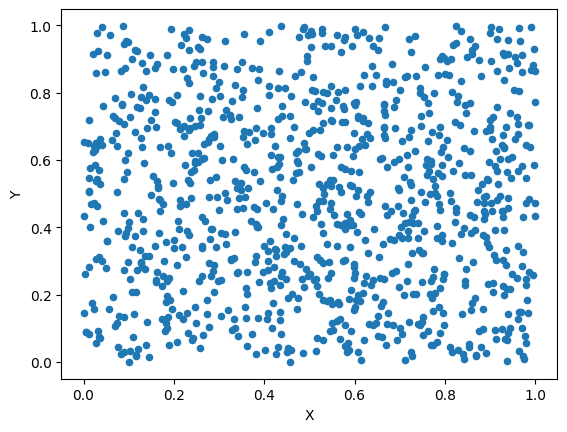

In [3]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)



<Axes: xlabel='X', ylabel='Y'>

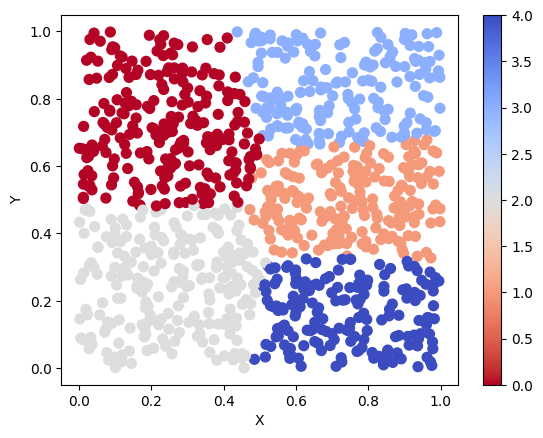

In [4]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [7]:
Univ = pd.read_csv("Universities_Clustering.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [ ]:
df_norm = norm_func(Univ.iloc[:,1:])

In [ ]:
df_norm.head(10)  # Top 10 rows


In [ ]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [ ]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [ ]:
y_kmeans
#clf.cluster_centers_
clf.labels_

In [ ]:
y_kmeans

In [ ]:
clf.cluster_centers_

In [ ]:
clf.inertia_

In [ ]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object
Univ['clust']=md # creating a  new column and assigning it to new column
Univ

In [ ]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

In [ ]:
plt.style.use(['classic'])
print(plt.style.available)

In [ ]:
Univ.plot(x="Top10",y ="SAT",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

In [ ]:
WCSS